### Getting data from OSM using python based APIs

This .ipynb showcases the use of osmnx to retrieve data from OSM. Below more resources that might be useful:

* [OSMnx 1.3.0](https://osmnx.readthedocs.io/en/stable/index.html)

* [Accessing OSM Data in Python](https://pygis.io/docs/d_access_osm.html#osmnx)

* [Daribas OSM examples](http://darribas.org/gds4ae/content/notebooks/06-OpenStreetMap.html)

* [Tag Finder](https://tagfinder.osm.ch/)

In [1]:
# import osmnx
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
## Find modules available in the version installed
#help (ox)
# dir(ox)
[i for i in dir(ox) if "geometries_from_" in i]

['geometries_from_address',
 'geometries_from_bbox',
 'geometries_from_place',
 'geometries_from_point',
 'geometries_from_polygon',
 'geometries_from_xml']

#### Specify the area

In [3]:
# Specify the name that is used to seach for the data
place_name = "Copperbelt, Zambia"         ## small area to be used for testing "Edgewood Washington, DC, USA"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

### You may want to use this for local shapefiles
#admin_path = r'C:\Users\alexl\Dropbox\Self-employment\Imperial work\Zambia\Code\Sample_Input\admin'
#admin_name = "Copperbelt.gpkg"   
#area = gpd.read_file(admin_path + "\\" + admin_name)

In [4]:
area.head(2)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((26.77180 -13.66247, 26.77238 -13.668...",-12.221685,-13.936307,29.084702,26.771796,296968990,relation,318860,-13.021417,27.887618,"Copperbelt Province, Zambia",boundary,administrative,0.76001


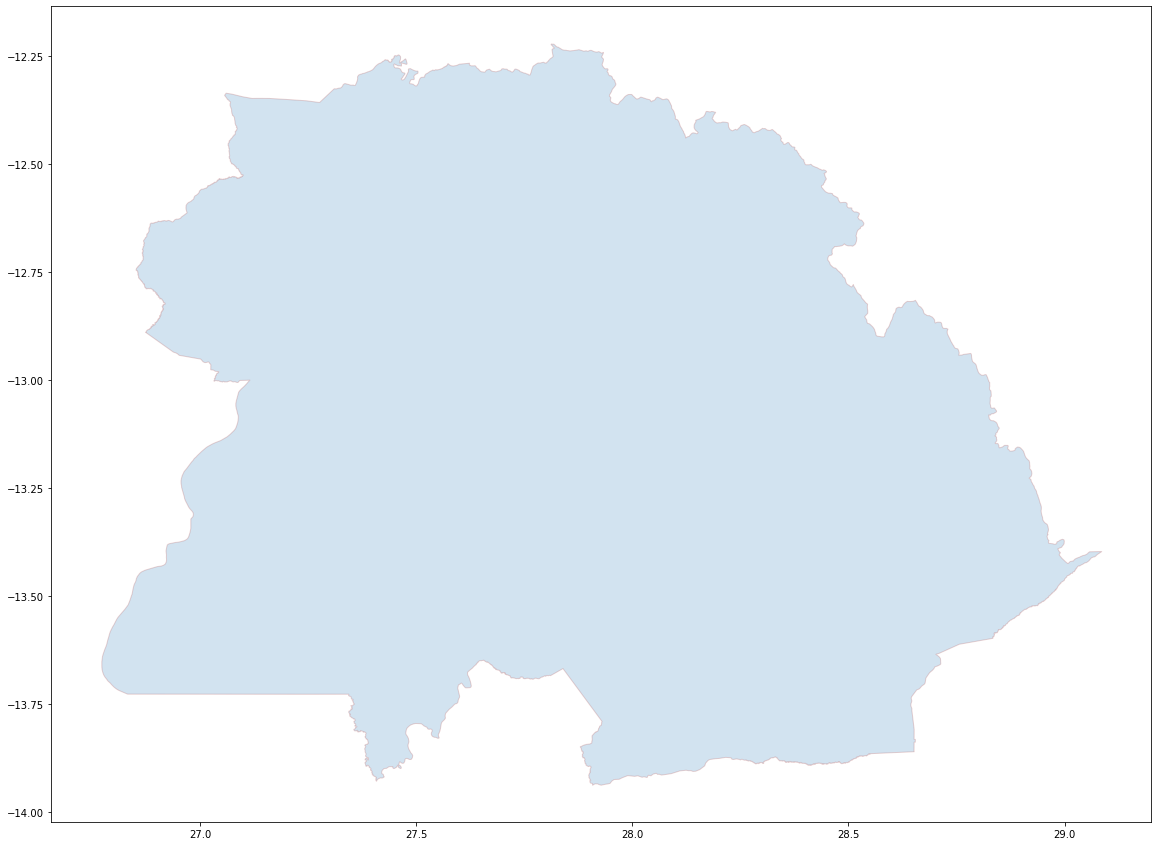

In [5]:
# Plot fishnet & basemap
fig, ax = plt.subplots(figsize=(25, 15))
area.plot(ax=ax, edgecolor='brown', alpha=0.2)
ax.set_aspect('equal', 'box')

In [11]:
# List key-value pairs for tags
tags = {'building': True}                  ## This will extract all building forms
#tags = {'building': 'residential'}        ## You may want to use this to extract only blds tagged are residential

#buildings = ox.geometries_from_place(place_name, tags)                ## To be used if you want to tag by location's name
buildings = ox.geometries_from_polygon(area.squeeze().geometry, tags)  ## To be used if you want to tag by geometry/polygon
buildings.head()

C:\Users\alexl\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nodes  \
element_type osmid                                                          
way          413974713  [4151752486, 4151752487, 4151752488, 415175328...   
             413974714  [4151753290, 4151753291, 4151753292, 415175329...   
             413974720  [4151753314, 4151753315, 4151753316, 415175331...   
             413974721  [4151753318, 4151753319, 4151753320, 415175332...   
             413974722  [4151753322, 4151753323, 4151753324, 415175332...   

                           building  \
element_type osmid                    
way          413974713          yes   
             413974714          yes   
             413974720  residential   
             413974721          yes   
             413974722          yes   

                                                                 geometry  \
element_type osmid                                                          
way          413974713  POLYGON ((27.85365 -13.54444, 27.85367 -13.544...   
             413974714  POLYGON ((27.85381 -13.54433, 27.85382 -13.544...   
             413974720  POLYGON ((27.80653 -13.64157, 27.80658 -13.641...   
             413974721  POLYGON ((27.80730 -13.64049, 27.80735 -13.640...   
             413974722  POLYGON ((27.80456 -13.64391, 27.80458 -13.643...   

                       source building:levels height man_made tower:type  \
element_type osmid                                                         
way          413974713    NaN             NaN    NaN      NaN        NaN   
             413974714    NaN             NaN    NaN      NaN        NaN   
             413974720  Akros             NaN    NaN      NaN        NaN   
             413974721    NaN             NaN    NaN      NaN        NaN   
             413974722    NaN             NaN    NaN      NaN        NaN   

                       abandoned layer  ... fuel:gasoline fuel:lpg  \
element_type osmid                      ...                          
way          413974713       NaN   NaN  ...           NaN      NaN   
             413974714       NaN   NaN  ...           NaN      NaN   
             413974720       NaN   NaN  ...           NaN      NaN   
             413974721       NaN   NaN  ...           NaN      NaN   
             413974722       NaN   NaN  ...           NaN      NaN   

                       mapwithai:source old_name  bus public_transport golf  \
element_type osmid                                                            
way          413974713              NaN      NaN  NaN              NaN  NaN   
             413974714              NaN      NaN  NaN              NaN  NaN   
             413974720              NaN      NaN  NaN              NaN  NaN   
             413974721              NaN      NaN  NaN              NaN  NaN   
             413974722              NaN      NaN  NaN              NaN  NaN   

                       addr:district fuel substance  
element_type osmid                                   
way          413974713           NaN  NaN       NaN  
             413974714           NaN  NaN       NaN  
             413974720           NaN  NaN       NaN  
             413974721           NaN  NaN       NaN  
             413974722           NaN  NaN       NaN  

[5 rows x 75 columns]

In [12]:
buildings.shape[0]

C:\Users\alexl\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


546028

In [13]:
# Keeping all buildings that are not points (either Polygons or MultiPolygons)
buildings = buildings.loc[buildings.geometry.type!='Point']

In [14]:
buildings

nodes  \
element_type osmid                                                          
way          413974713  [4151752486, 4151752487, 4151752488, 415175328...   
             413974714  [4151753290, 4151753291, 4151753292, 415175329...   
             413974720  [4151753314, 4151753315, 4151753316, 415175331...   
             413974721  [4151753318, 4151753319, 4151753320, 415175332...   
             413974722  [4151753322, 4151753323, 4151753324, 415175332...   
...                                                                   ...   
             803286468  [7514088557, 7514088556, 7514088555, 751408855...   
             803286469  [7514088561, 7514088560, 7514088559, 751408855...   
             803286470  [7514088565, 7514088564, 7514088563, 751408856...   
             803286471  [7514088569, 7514088568, 7514088567, 751408856...   
             803286472  [7514088573, 7514088572, 7514088571, 751408857...   

                           building  \
element_type osmid                    
way          413974713          yes   
             413974714          yes   
             413974720  residential   
             413974721          yes   
             413974722          yes   
...                             ...   
             803286468  residential   
             803286469  residential   
             803286470  residential   
             803286471  residential   
             803286472  residential   

                                                                 geometry  \
element_type osmid                                                          
way          413974713  POLYGON ((27.85365 -13.54444, 27.85367 -13.544...   
             413974714  POLYGON ((27.85381 -13.54433, 27.85382 -13.544...   
             413974720  POLYGON ((27.80653 -13.64157, 27.80658 -13.641...   
             413974721  POLYGON ((27.80730 -13.64049, 27.80735 -13.640...   
             413974722  POLYGON ((27.80456 -13.64391, 27.80458 -13.643...   
...                                                                   ...   
             803286468  POLYGON ((27.08089 -12.38963, 27.08089 -12.389...   
             803286469  POLYGON ((27.08187 -12.38980, 27.08187 -12.389...   
             803286470  POLYGON ((27.08193 -12.39012, 27.08198 -12.390...   
             803286471  POLYGON ((27.08043 -12.39189, 27.08050 -12.391...   
             803286472  POLYGON ((27.08034 -12.39192, 27.08040 -12.391...   

                       source building:levels height man_made tower:type  \
element_type osmid                                                         
way          413974713    NaN             NaN    NaN      NaN        NaN   
             413974714    NaN             NaN    NaN      NaN        NaN   
             413974720  Akros             NaN    NaN      NaN        NaN   
             413974721    NaN             NaN    NaN      NaN        NaN   
             413974722    NaN             NaN    NaN      NaN        NaN   
...                       ...             ...    ...      ...        ...   
             803286468  akros             NaN    NaN      NaN        NaN   
             803286469  akros             NaN    NaN      NaN        NaN   
             803286470  akros             NaN    NaN      NaN        NaN   
             803286471  akros             NaN    NaN      NaN        NaN   
             803286472  akros             NaN    NaN      NaN        NaN   

                       abandoned layer  ... fuel:gasoline fuel:lpg  \
element_type osmid                      ...                          
way          413974713       NaN   NaN  ...           NaN      NaN   
             413974714       NaN   NaN  ...           NaN      NaN   
             413974720       NaN   NaN  ...           NaN      NaN   
             413974721       NaN   NaN  ...           NaN      NaN   
             413974722       NaN   NaN  ...           NaN      NaN   
...                          ...   ...  ...           ...      ...   
       

In [15]:
# Get volume of buildings in the area
buildings.building.value_counts()

C:\Users\alexl\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


residential          305439
yes                  234255
construction           5238
house                   395
detached                313
school                   66
farm_auxiliary           64
industrial               54
terrace                  32
retail                   22
university               21
silo                     14
hut                      14
church                    9
commercial                8
storage_tank              7
roof                      6
garage                    5
warehouse                 5
hospital                  4
shed                      3
apartments                3
cowshed                   3
Underconstruction         2
transportation            2
hangar                    2
stadium                   2
transformer_tower         1
hotel                     1
supermarket               1
S                         1
office                    1
Name: building, dtype: int64

In [16]:
## Estimate size of buildings in square meters
buildingsProj = buildings.copy()
buildingsProj = buildingsProj.to_crs({'init': 'epsg:32736'})         ## For Zambia
buildingsProj["sq.m"] = buildingsProj['geometry'].area

C:\Users\alexl\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [17]:
buildingsProj.groupby('building', as_index=False)['sq.m'].mean()

,building,sq.m
0,S,1049.195304
1,Underconstruction,24.517913
2,apartments,989.209775
3,church,261.517384
4,commercial,990.988123
5,construction,133.889142
6,cowshed,120.481742
7,detached,51.096541
8,farm_auxiliary,1271.333748
9,garage,85.406168


In [18]:
## Filter based on type of buildings
buildingsProj  = buildingsProj[buildingsProj["building"].str.contains('residential|house|hut|apartment')]

C:\Users\alexl\anaconda3\envs\ox\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
buildingsProj.groupby('building', as_index=False)['sq.m'].mean()

,building,sq.m
0,apartments,989.209775
1,house,157.377530
2,hut,30.043035
3,residential,82.875540
4,warehouse,2217.783879
